In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [266]:
df=pd.read_csv("datos.csv")

In [175]:
df.head()



,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0


In [176]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


El objetivo es responder a la pregunta ¿cuál es el efecto de una arteria sobre el precio de la vivienda?

In [177]:
df.iloc[0,0]
df.loc[0,"YearBuilt"]

19

In [178]:
df.iloc[0,0]
df.loc[0,"SalePrice"]

208500

In [179]:
df.tail()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0
1459,9937,5,6,57,57,4,3,3,1,0,147500,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


In [181]:
df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,50.732192,37.134247,3.39589,3.083562,2.866438,1.767123,2.758904,180921.195890,0.032877
std,9981.264932,1.382997,1.112799,30.202904,20.645407,0.57428,0.351054,0.815778,0.747315,40.177307,79442.502883,0.178375
min,1300.000000,1.000000,1.000000,12.000000,12.000000,2.00000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,5.000000,22.000000,18.000000,3.00000,3.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,5.000000,49.000000,28.000000,3.00000,3.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,6.000000,68.000000,55.000000,4.00000,3.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,9.000000,150.000000,72.000000,5.00000,5.000000,8.000000,4.000000,738.000000,755000.000000,1.000000


In [182]:
df.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
BedroomAbvGr    0
GarageCars      0
PoolArea        0
SalePrice       0
Artery          0
dtype: int64

In [183]:
df.dropna()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [184]:
df.duplicated().sum()

0

In [185]:
df.drop_duplicates()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [186]:
q1=df["SalePrice"].quantile(.25)
q3=df["SalePrice"].quantile(.75)
qr=q3-q1

In [187]:
q1

129975.0

In [188]:
q3

214000.0

In [189]:
qr

84025.0

In [190]:
lim_inf=q1-(1.5*qr)##LIMITE INFERIOR

In [191]:
lim_inf

3937.5

In [192]:
lim_sup=q3+(1.5*qr)

In [193]:
lim_sup

340037.5

In [194]:
df[(df["SalePrice"]>lim_inf)&(df["SalePrice"]<lim_sup)]

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [195]:
df.pivot_table(index=["Artery","OverallQual"],
               values="YearBuilt",
               aggfunc=["mean","median"])

mean    median
                     YearBuilt YearBuilt
Artery OverallQual                      
0      1             88.000000      88.0
       2             87.000000      86.0
       3             86.500000      84.5
       4             73.362832      68.0
       5             66.320000      63.0
       6             53.161560      50.0
       7             33.334385      22.0
       8             24.012048      19.0
       9             16.883721      16.0
       10            17.687500      15.5
1      3            114.500000     114.5
       4             87.000000      82.0
       5             83.409091      81.0
       6             83.133333      81.0
       7             96.500000      96.5
       8            122.000000     122.0
       10           129.500000     129.5

In [196]:
df["Artery"].value_counts()

0    1412
1      48
Name: Artery, dtype: int64

In [197]:
df["OverallQual"].value_counts(normalize=True)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

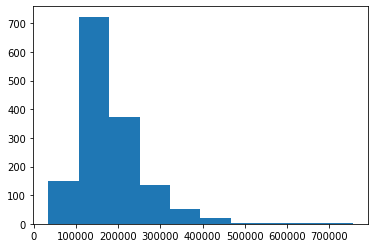

In [198]:
plt.hist(df["SalePrice"],
         bins=10)
plt.show ()

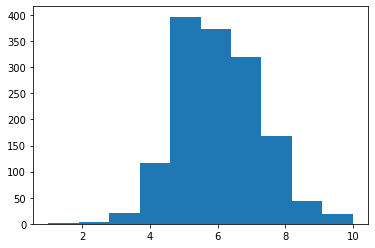

In [199]:
plt.hist(df["OverallQual"],
         bins=10)
plt.show ()

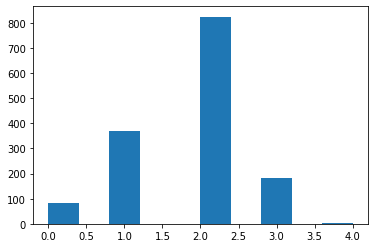

In [200]:
plt.hist(df["GarageCars"],
         bins=10)
plt.show ()

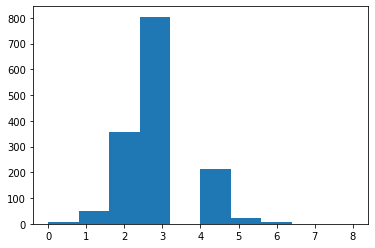

In [201]:
plt.hist(df["BedroomAbvGr"],
         bins=10)
plt.show ()

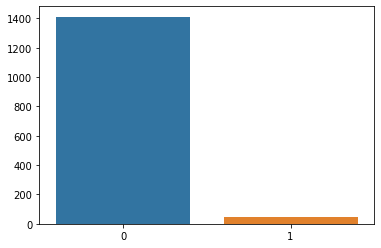

In [202]:
Carretera=df["Artery"].value_counts()
sns.barplot(x=Carretera.index,
            y=Carretera.values)
plt.show()

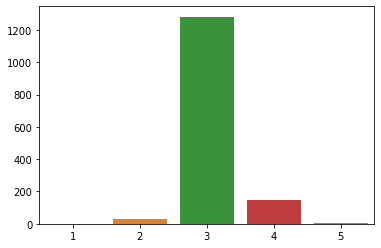

In [203]:
Fachada=df["ExterCond"].value_counts()
sns.barplot(x=Fachada.index,
            y=Fachada.values)
plt.show()

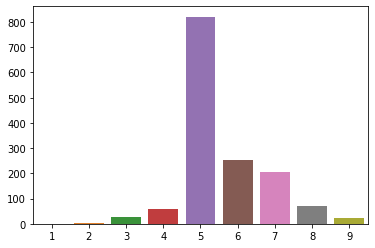

In [204]:
Inmueble=df["OverallCond"].value_counts()
sns.barplot(x=Inmueble.index,
            y=Inmueble.values)
plt.show()

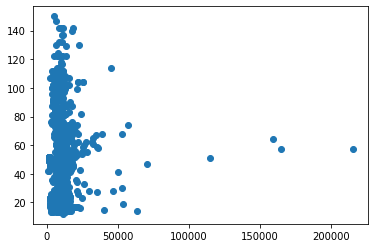

In [259]:
plt.scatter(df["LotArea"],
            df["YearBuilt"])##dispersion 
plt.show()

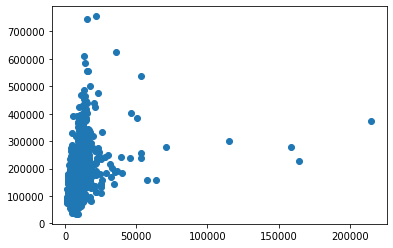

In [270]:
plt.scatter(df["LotArea"],
            df["SalePrice"])##dispersion 
plt.show()

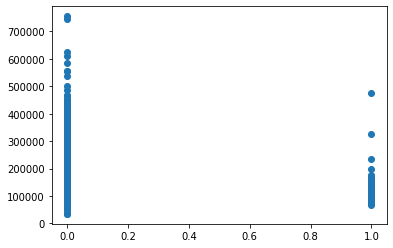

In [275]:
plt.scatter(df["Artery"],
            df["SalePrice"])##dispersion 
plt.show()

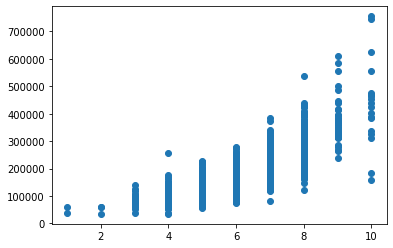

In [271]:
plt.scatter(df["OverallQual"],
            df["SalePrice"])##dispersion 
plt.show()

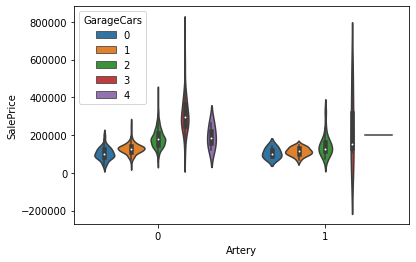

In [273]:
sns.violinplot(data=df,
            x="Artery",
            y="SalePrice",
            hue="GarageCars")##convinacion de histograma y diagrama de barras

plt.show()

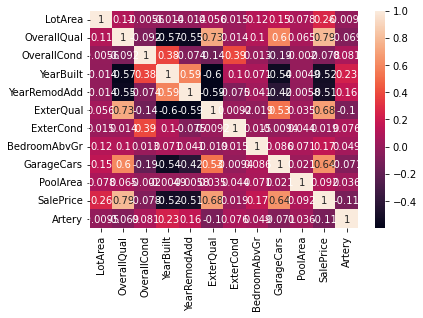

In [274]:
sns.heatmap(df.corr(),
            annot=True)##gradico de correlacion
plt.show()

In [236]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [247]:
df=df[["LotArea","OverallQual","YearBuilt","ExterQual","BedroomAbvGr","SalePrice","Artery"]]

In [248]:
df.isna().sum()

LotArea         0
OverallQual     0
YearBuilt       0
ExterQual       0
BedroomAbvGr    0
SalePrice       0
Artery          0
dtype: int64

In [249]:
df.duplicated().sum()

0

In [250]:
df=pd.get_dummies(df,drop_first=True)

In [251]:
df

,LotArea,OverallQual,YearBuilt,ExterQual,BedroomAbvGr,SalePrice,Artery
0,8450,7,19,4,3,208500,0
1,9600,6,46,3,3,181500,0
2,11250,7,21,4,3,223500,0
3,9550,7,107,3,3,140000,0
4,14260,8,22,4,4,250000,0
...,...,...,...,...,...,...,...
1455,7917,6,23,3,3,175000,0
1456,13175,6,44,3,3,210000,0
1457,9042,7,81,5,4,266500,0
1458,9717,5,72,3,2,142125,0


In [252]:
y=df.pop("SalePrice")
x=sm.add_constant(df.copy())
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     558.8
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:02:16   Log-Likelihood:                -17671.
No. Observations:                1460   AIC:                         3.536e+04
Df Residuals:                    1453   BIC:                         3.539e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.554e+05   1.09e+04    -14.247      0.000   -1.77e+05   -1.34e+05
LotArea          1.4244      0.116     12.250      0.000       1.196       1.652
OverallQual   3.199e+04   1275.655     25.076      0.000    2.95e+04    3.45e+04
YearBuilt     -169.5187     50.570     -3.352      0.001    -268.716     -70.322
ExterQual     3.157e+04   3080.708     10.249      0.000    2.55e+04    3.76e+04
BedroomAbvGr  9800.3276   1443.672      6.788      0.000    6968.423    1.26e+04
Artery       -1.486e+04   6630.720     -2.242      0.025   -2.79e+04   -1856.309
==============================================================================
Omnibus:                      661.545   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11126.636
Skew:                           1.674   Prob(JB):                         0.00
Kurtosis:                      16.103   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

identifique a través de una regresión el efecto de una arteria sobre el precio, no olvide las variables de control

RTA:/ la relacion de la variable Dependiente Precios y la variable independiente Artey es inversa, por lo que se deduce que si existe una via principal  el precio de la vivienda se reduce dramaticamente. la significada estadistica es alta.